In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt 

from create_sequence_w_labels import hmmgenerate
from initial_guess import get_initial_values

from baum_welch import fit as bw_fit
from cml_incomplete_normalized import fit as cml_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
K = 2          # num of states
L = 2          # num of observations
T = 512       # num of sequences
N = 128         # Length of each sequence
noise = 0.2    # Noice
epoch = 15     # Epoch for cml  

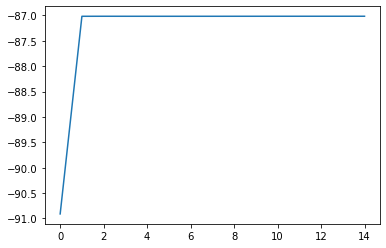

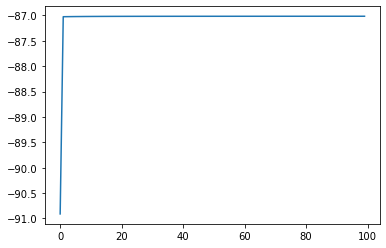

The CML approach gives 0.9999406819861828 times better probability estimation than what BW approach does.


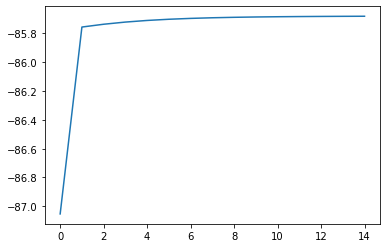

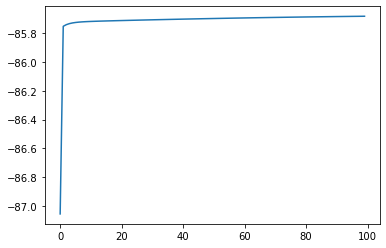

The CML approach gives 1.004110058252948 times better probability estimation than what BW approach does.


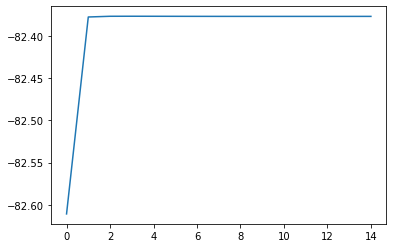

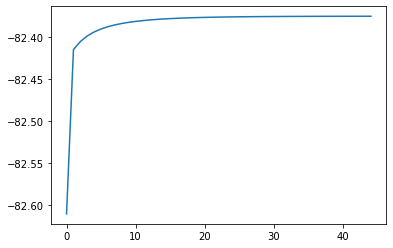

The CML approach gives 0.9985950389498087 times better probability estimation than what BW approach does.


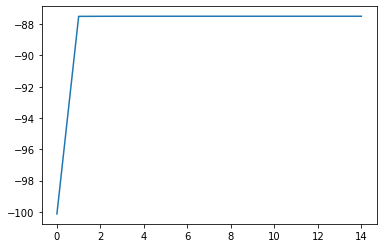

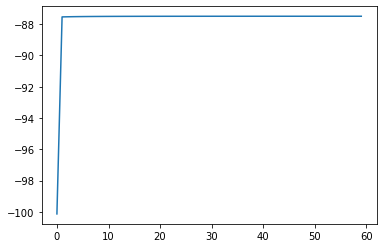

The CML approach gives 0.9982548737354828 times better probability estimation than what BW approach does.


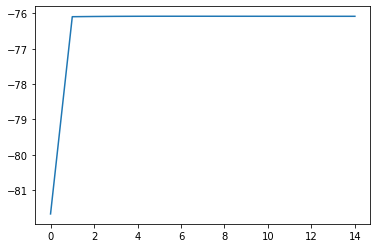

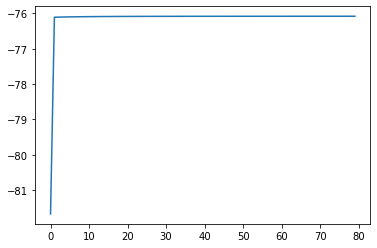

The CML approach gives 0.9980654574954614 times better probability estimation than what BW approach does.


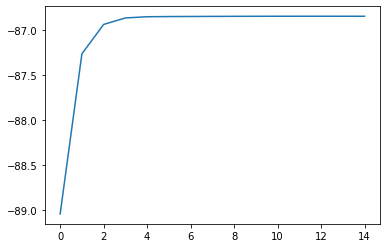

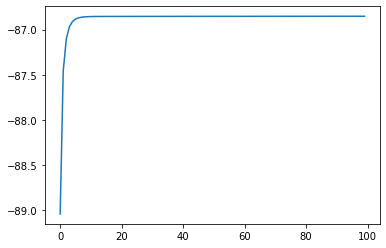

The CML approach gives 1.0023453405595475 times better probability estimation than what BW approach does.


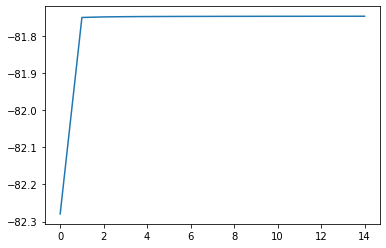

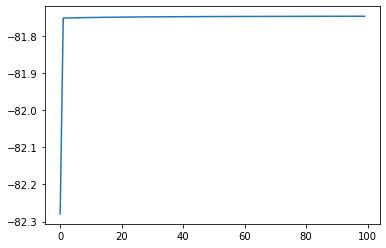

The CML approach gives 1.0002480313142894 times better probability estimation than what BW approach does.


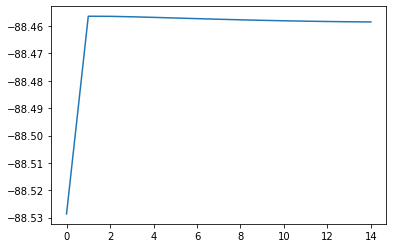

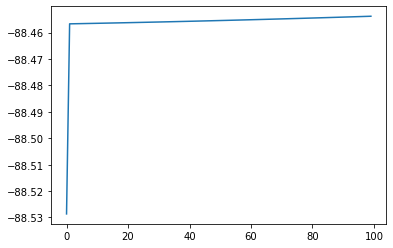

The CML approach gives 0.9953268950488768 times better probability estimation than what BW approach does.


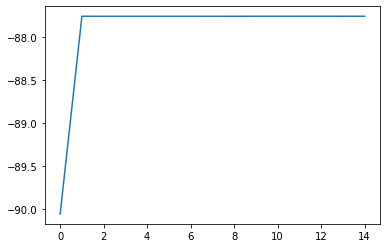

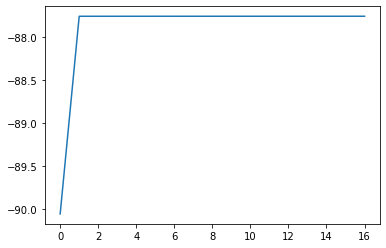

The CML approach gives 0.9992286205812055 times better probability estimation than what BW approach does.


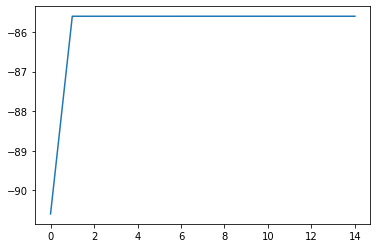

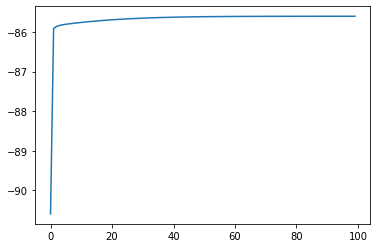

The CML approach gives 0.9996337374430925 times better probability estimation than what BW approach does.


In [7]:
for i in range(10):
    A_gt, B_gt, pi_gt, P_gt, observations, states, labels = hmmgenerate(K, L, T, N, S=0, D=0, edhmm = False, complete=False)
    A_init, B_init, pi_init, P_init = get_initial_values(A_gt, B_gt, noise, P_gt, have_P = True)
    
    A, B, P, pi, ln_P_list_CML = cml_fit(A_init, B_init, P_init, pi_init, observations, labels, epoch, update_A=True, update_B=True, update_P=True, update_pi=True)
    #print('Best observation probability we can get with CML approach is:', np.max(ln_P_list))
    plt.show(plt.plot(ln_P_list_CML))
    
    A, B, pi, ln_P_list_BW, _, _ = bw_fit(A_init, B_init, observations, K, pi=pi_init, hold_A=False, hold_B=False, hold_pi=False, TOL=1e-5)
    #print('Best observation probability we can get with BW approach is:', np.max(ln_P_list))
    plt.show(plt.plot(ln_P_list_BW))
    
    print('The CML approach gives ' + str(np.exp((ln_P_list_CML[-1]) - (ln_P_list_BW[-1]))) + ' times better probability estimation than what BW approach does.')